# 1. Input the required libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools
!pip install npzviewer

# 2. Load the dataset after loading the dataset, you have to normalize every image.

In [2]:
df = np.load('ORL_faces.npz') 

In [3]:
# loading the "Train dataset"
x_train = df['trainX']

In [4]:
x_train = np.array(x_train,dtype='float32')/255

In [5]:
x_test = df['testX']
x_test = np.array(x_test,dtype='float32')/255

In [6]:
# load the Label of Images
y_train= df['trainY']
y_test= df['testY']

In [7]:
print(x_train.shape)

print(y_train.shape)

print(x_test.shape)

print(y_test.shape)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [13]:
print('x_train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test))
print('y_train shape: {}'.format(y_train))
print('y_test shape: {}'.format(y_test))

x_train shape: [ 9  1  7  4 18 15  1 14 18  2  2 10  7  3  7 16 14 10 13  4 11  2  9 15
  0  0  7 19 15  1 11 18 10  5  6  1 10  7  0 16 12  2  0  6  5 11 17  4
 17 14 15 16 19 12 18 13 17  4 15 19 12 16 14  3 11 16 11 12 10  6  8 16
 15  8  9 11 18  0  6 17 16 17 19  3 17  5  2  1 14  7 11  9 13  3 12 15
  5  5 16  7  0  2 17 18 19  2  2  0 13  3 13  3  4 16  3 18 14  8  1 16
 14  9 16  6  9  3  2 10 15  7  0  0 14 12 12 19 13 12 11  5  0  7 15  4
  9  4  0  1  1 17  4  2  8  3 10  8  1 11 12  9 19  5 13 15  1 12  1 11
  4 13  6  5  5 19 10 14  6  2 12  7  9  8  8 15  7 10  8  8 11 14 15 18
 17 19  3  7  0 16  4  4  5 17 18 13  6 19 12  9 14  2  6  3 19  9  8 18
 17  4 10  8  6  1 19  8 18  5 10  9]
x_test shape: [[[[0.16078432]
   [0.18431373]
   [0.18431373]
   ...
   [0.20392157]
   [0.18039216]
   [0.19215687]]

  [[0.17254902]
   [0.16862746]
   [0.16862746]
   ...
   [0.19607843]
   [0.19215687]
   [0.18039216]]

  [[0.1882353 ]
   [0.18431373]
   [0.18039216]
   ...
   [0.19607

# 3. Split the dataset (Validation and Training)

In [9]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=123)

# 4. Transform the images to equal sizes to feed in CNN

In [14]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

In [16]:
print('x_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: (228,)
x_test shape: (160,)


#  5.Build a CNN model that has 3 main layers:

## i. Convolutional Layer
## ii. Pooling Layer
## iii. Fully Connected Layer

In [17]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

C:\Users\soura\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

# 6.Train the Model

In [19]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 7s - loss: 3.0174 - accuracy: 0.0482 - val_loss: 2.9751 - val_accuracy: 0.0833 - 7s/epoch - 7s/step
Epoch 2/250
1/1 - 4s - loss: 2.9932 - accuracy: 0.0658 - val_loss: 2.9753 - val_accuracy: 0.0833 - 4s/epoch - 4s/step
Epoch 3/250
1/1 - 6s - loss: 3.0068 - accuracy: 0.0658 - val_loss: 2.9799 - val_accuracy: 0.0833 - 6s/epoch - 6s/step
Epoch 4/250
1/1 - 5s - loss: 2.9971 - accuracy: 0.0658 - val_loss: 2.9848 - val_accuracy: 0.0833 - 5s/epoch - 5s/step
Epoch 5/250
1/1 - 5s - loss: 2.9936 - accuracy: 0.0658 - val_loss: 2.9887 - val_accuracy: 0.0833 - 5s/epoch - 5s/step
Epoch 6/250
1/1 - 5s - loss: 2.9729 - accuracy: 0.1009 - val_loss: 2.9875 - val_accuracy: 0.0833 - 5s/epoch - 5s/step
Epoch 7/250
1/1 - 4s - loss: 2.9751 - accuracy: 0.0789 - val_loss: 2.9832 - val_accuracy: 0.1667 - 4s/epoch - 4s/step
Epoch 8/250
1/1 - 4s - loss: 2.9761 - accuracy: 0.0746 - val_loss: 2.9799 - val_accuracy: 0.1667 - 4s/epoch - 4s/step
Epoch 9/250
1/1 - 5s - loss: 2.9768 - accuracy: 0.0526 -

Epoch 70/250
1/1 - 5s - loss: 0.7226 - accuracy: 0.7895 - val_loss: 0.3254 - val_accuracy: 0.9167 - 5s/epoch - 5s/step
Epoch 71/250
1/1 - 5s - loss: 0.7528 - accuracy: 0.7807 - val_loss: 0.3575 - val_accuracy: 0.9167 - 5s/epoch - 5s/step
Epoch 72/250
1/1 - 5s - loss: 0.6161 - accuracy: 0.8596 - val_loss: 0.3461 - val_accuracy: 0.9167 - 5s/epoch - 5s/step
Epoch 73/250
1/1 - 5s - loss: 0.6864 - accuracy: 0.7719 - val_loss: 0.3111 - val_accuracy: 0.9167 - 5s/epoch - 5s/step
Epoch 74/250
1/1 - 5s - loss: 0.6250 - accuracy: 0.8246 - val_loss: 0.2973 - val_accuracy: 0.9167 - 5s/epoch - 5s/step
Epoch 75/250
1/1 - 6s - loss: 0.5291 - accuracy: 0.8640 - val_loss: 0.2771 - val_accuracy: 0.9167 - 6s/epoch - 6s/step
Epoch 76/250
1/1 - 6s - loss: 0.5843 - accuracy: 0.8421 - val_loss: 0.2533 - val_accuracy: 0.9167 - 6s/epoch - 6s/step
Epoch 77/250
1/1 - 6s - loss: 0.4748 - accuracy: 0.8728 - val_loss: 0.2386 - val_accuracy: 0.9167 - 6s/epoch - 6s/step
Epoch 78/250
1/1 - 6s - loss: 0.5016 - accuracy:

Epoch 139/250
1/1 - 6s - loss: 0.0441 - accuracy: 0.9956 - val_loss: 0.0594 - val_accuracy: 1.0000 - 6s/epoch - 6s/step
Epoch 140/250
1/1 - 5s - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.0630 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 141/250
1/1 - 6s - loss: 0.0754 - accuracy: 0.9518 - val_loss: 0.0486 - val_accuracy: 1.0000 - 6s/epoch - 6s/step
Epoch 142/250
1/1 - 5s - loss: 0.0507 - accuracy: 0.9868 - val_loss: 0.0332 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 143/250
1/1 - 5s - loss: 0.0766 - accuracy: 0.9781 - val_loss: 0.0244 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 144/250
1/1 - 6s - loss: 0.0414 - accuracy: 0.9956 - val_loss: 0.0232 - val_accuracy: 1.0000 - 6s/epoch - 6s/step
Epoch 145/250
1/1 - 6s - loss: 0.0533 - accuracy: 0.9912 - val_loss: 0.0237 - val_accuracy: 1.0000 - 6s/epoch - 6s/step
Epoch 146/250
1/1 - 5s - loss: 0.0387 - accuracy: 0.9912 - val_loss: 0.0234 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 147/250
1/1 - 6s - loss: 0.0614 - 

Epoch 208/250
1/1 - 5s - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0062 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 209/250
1/1 - 7s - loss: 0.0244 - accuracy: 0.9956 - val_loss: 0.0054 - val_accuracy: 1.0000 - 7s/epoch - 7s/step
Epoch 210/250
1/1 - 6s - loss: 0.0222 - accuracy: 0.9956 - val_loss: 0.0045 - val_accuracy: 1.0000 - 6s/epoch - 6s/step
Epoch 211/250
1/1 - 7s - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 7s/epoch - 7s/step
Epoch 212/250
1/1 - 5s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 213/250
1/1 - 5s - loss: 0.0180 - accuracy: 0.9912 - val_loss: 0.0037 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 214/250
1/1 - 5s - loss: 0.0204 - accuracy: 0.9956 - val_loss: 0.0038 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 215/250
1/1 - 5s - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 216/250
1/1 - 5s - loss: 0.0187 - 

In [24]:
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {}'.format(score[0]))
print('test acc {}'.format(score[1]))

test los 0.31395694613456726
test acc 0.9437500238418579


# 7.Plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


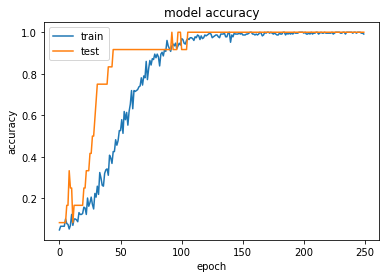

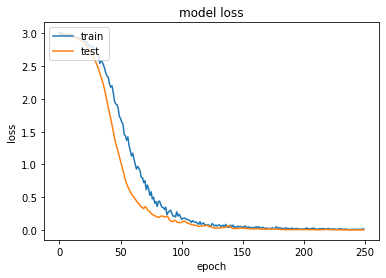

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 8. Iterate the model until the accuracy is above 90%

In [43]:
print('test acc {}'.format(score[1]))

test acc 0.9437500238418579


In [44]:
# The model accuracy is above 90%